### Import libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
random_seed=211086

### Import the datasets (dataset was already split into training and testing set)

In [43]:
titanic_train =pd.read_csv(r'C:\Users\Stefanos\Downloads\titanic_data\titanic_train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
titanic_test =pd.read_csv(r'C:\Users\Stefanos\Downloads\titanic_data\titanic_test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Change the Sex and Embarked column types from object to categorical for both datasets

In [45]:
titanic_train.loc[(titanic_train.Sex=="male"),"Sex"]=1
titanic_train.loc[(titanic_train.Sex=="female"),"Sex"]=0
titanic_test.loc[(titanic_test.Sex=="male"),"Sex"]=1
titanic_test.loc[(titanic_test.Sex=="female"),"Sex"]=0

titanic_train.loc[(titanic_train.Embarked=="Q"),"Embarked"]=1
titanic_train.loc[(titanic_train.Embarked=="S"),"Embarked"]=2
titanic_train.loc[(titanic_train.Embarked=="C"),"Embarked"]=3
titanic_test.loc[(titanic_test.Embarked=="Q"),"Embarked"]=1
titanic_test.loc[(titanic_test.Embarked=="S"),"Embarked"]=2
titanic_test.loc[(titanic_test.Embarked=="C"),"Embarked"]=3

### Dropping unecessary columns

In [46]:
titanic_train= titanic_train.drop(['Name','Ticket','Cabin'],axis = 1)

titanic_test= titanic_test.drop(['Name','Ticket','Cabin'],1)

C:\Users\Stefanos\AppData\Local\Temp/ipykernel_15164/2046567316.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic_test= titanic_test.drop(['Name','Ticket','Cabin'],1)


### Checking the columns' data types

In [47]:
titanic_train.dtypes, titanic_test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Embarked        object
 dtype: object,
 PassengerId      int64
 Pclass           int64
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Embarked        object
 dtype: object)

### Embarked column has different type in the train set than in the test set. We change it to be categorical type in both.

In [48]:
titanic_train['Embarked'] = titanic_train['Embarked'].astype('category')
titanic_test['Embarked'] = titanic_test['Embarked'].astype('category')

### Check for NaN values

In [49]:
titanic_train.isna().sum(), titanic_test.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Fare             0
 Embarked         2
 dtype: int64,
 PassengerId     0
 Pclass          0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Fare            1
 Embarked        0
 dtype: int64)

### Check for duplicate rows

In [93]:
titanic_train.duplicated().sum()

0

### Check the distributions of our columns

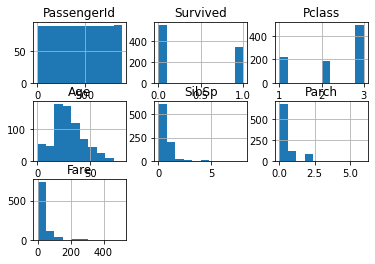

In [50]:
titanic_train.hist();

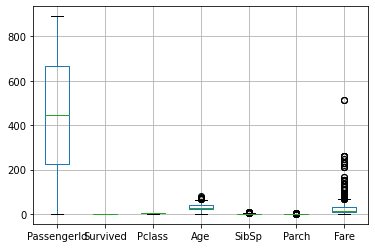

In [51]:
titanic_train.boxplot();

### Since there are outliers present we replace the NaN values with the median 

In [52]:
titanic_train=titanic_train.fillna(titanic_train.median())
titanic_test=titanic_test.fillna(titanic_test.median())

C:\Users\Stefanos\AppData\Local\Temp/ipykernel_15164/1192984086.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_train=titanic_train.fillna(titanic_train.median())
C:\Users\Stefanos\AppData\Local\Temp/ipykernel_15164/1192984086.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_test=titanic_test.fillna(titanic_test.median())


In [53]:
titanic_train.isna().sum(), titanic_test.isna().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       2
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64)

### There are still 2 NaN values in the 'Embarked' column so we have to drop them.

In [54]:
titanic_train.dropna(inplace=True)

### Check our data frame again

In [55]:
titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,3
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,3


### Change PassengerId, Pclass, and Sex column types to categorical as well.

In [56]:
titanic_train['PassengerId'] = titanic_train['PassengerId'].astype('category')
titanic_train['Sex'] = titanic_train['Sex'].astype('category')
titanic_train['Pclass'] = titanic_train['Pclass'].astype('category')

titanic_test['PassengerId'] = titanic_test['PassengerId'].astype('category')
titanic_test['Sex'] = titanic_test['Sex'].astype('category')
titanic_test['Pclass'] = titanic_test['Pclass'].astype('category')

### Examine how many observations each class has

In [57]:
titanic_train[titanic_train["Survived"]==0].count()

PassengerId    549
Survived       549
Pclass         549
Sex            549
Age            549
SibSp          549
Parch          549
Fare           549
Embarked       549
dtype: int64

In [58]:
titanic_train[titanic_train["Survived"]==1].count()

PassengerId    340
Survived       340
Pclass         340
Sex            340
Age            340
SibSp          340
Parch          340
Fare           340
Embarked       340
dtype: int64

### The dataset is imbalanced as there is a large difference in the class frequency. We have to consider that when fitting our model.

### First we scale the data to make it easier for our model to train 

In [59]:
scaler = StandardScaler()
titanic_train_scaled = scaler.fit_transform(titanic_train.drop(['Survived'], axis=1))
titanic_test_scaled = scaler.fit_transform(titanic_test)

### Split the data for training

In [87]:
# Create X, our features
X = titanic_train_scaled

# Create y, our target
y = titanic_train['Survived']

In [61]:
# Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

### We will test  two models: Decision Tree and Support Vector Machines

### First Decision Tree

In [62]:
# We instantiate the classifier
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(class_weight='balanced') # parameter set to'balanced to weigh the classes

### Fit the model

In [83]:
clf_DT_model = clf_DT.fit(X_train,y_train)

### Make the predictions

In [85]:
y_pred_DT = clf_DT_model.predict(titanic_test_scaled)

### Now the Support Vector Machines

In [65]:
# We instantiate the classifier
from sklearn.svm import SVC
clf_SVM = SVC(class_weight='balanced') # parameter set to'balanced to weigh the classes

### Fit the model

In [66]:
clf_SVM_model = clf_SVM.fit(X_train,y_train)

### Make the predictions

In [67]:
y_pred_SVM = clf_SVM_model.predict(titanic_test_scaled)

### Create columns for the models' predictions

In [68]:
titanic_test['Survived_DT'] = y_pred_DT

In [69]:
titanic_test['Survived_SVM'] = y_pred_SVM

### Check the data frame one last time

In [70]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_DT,Survived_SVM
0,892,3,1,34.5,0,0,7.8292,1,0,0
1,893,3,0,47.0,1,0,7.0000,2,0,1
2,894,2,1,62.0,0,0,9.6875,1,0,0
3,895,3,1,27.0,0,0,8.6625,2,0,0
4,896,3,0,22.0,1,1,12.2875,2,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2,0,0
414,1306,1,0,39.0,0,0,108.9000,3,1,1
415,1307,3,1,38.5,0,0,7.2500,2,0,0
416,1308,3,1,27.0,0,0,8.0500,2,0,0


### Count the number of survivors according to the DT model

In [71]:
survived_DT = titanic_test["PassengerId"][titanic_test["Survived_DT"]==1].count()
survived_DT

172

In [72]:
print(f'According to the Decision Tree {survived_DT} passengers survived')

According to the Decision Tree 172 passengers survived


In [102]:
print('Decision Tree - Classification Report')
print()
print(classification_report(y_test, clf_DT_model.predict(X_test))) 

Decision Tree - Classification Report

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       116
           1       0.63      0.74      0.68        62

    accuracy                           0.76       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.77      0.76      0.76       178



### Count the number of survivors according to the SVM model

In [73]:
survived_SVM = titanic_test["PassengerId"][titanic_test["Survived_SVM"]==1].count()
survived_SVM

163

In [74]:
print(f'According to the Support Vector Machines {survived_SVM} passengers survived')

According to the Support Vector Machines 163 passengers survived


In [103]:
print('Support Vector Machines - Classification Report')
print()
print(classification_report(y_test, clf_SVM_model.predict(X_test))) 

Support Vector Machines - Classification Report

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       116
           1       0.73      0.71      0.72        62

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



### Support Vector Machines has a higher F1-score, therefore it performs better than the Decision Tree.